# Notebook 3.4 - Curation-flag-coverage

This notebook analyses the metadata completness in the SSH Open Marketplace and writes back to the system via two dedicated curation properties: `curation-flag-coverage` and `curation-detail` properties.

This notebook flags Marketplace items that have too little number of metadata filled out, helping Moderators identify curation priorities to improve data quality. 

This notebook is part of a series of 4 notebooks that inform the curation properties used in the SSH Open Marketplace Editorial Dashboard.

It is composed of 3 sections:

0. Requirements to run the notebook
1. Coverage of recommended fields - overview
- for tools&services
- for training materials
- for datasets
- for publications
- for workflows(?)
2. Flag priority items for curation 

## 0 Requirements to run this notebook

This section gives all the relevant information to "interact" with the MP data.

### 0.1 libraries
*There are a number of external libraries needed to run the notebook* 

*Furthermore, a dedicated SSH Open Marketplace library - sshmarketplacelib - with customised functions has been created and can be imported using the python import commands.* 

*Below the libraries import needed to run this notebook*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #to create histograms and images
import requests
#import the MarketPlace Library 
from sshmarketplacelib import MPData as mpd
from sshmarketplacelib import  eval as eva, helper as hel

### 0.2 Get the data

In [2]:
mpdata = mpd()
df_tool_flat =mpdata.getMPItems ("toolsandservices", True)
df_publication_flat =mpdata.getMPItems ("publications", True)
df_trainingmaterials_flat =mpdata.getMPItems ("trainingmaterials", True)
df_workflows_flat =mpdata.getMPItems ("workflows", True)
df_datasets_flat =mpdata.getMPItems ("datasets", True)

getting data from local repository...
getting data from local repository...
getting data from local repository...
getting data from local repository...
getting data from local repository...


### 0.3 A look at the data

It can be useful to display the structure of the table. In the next cell the structure of the __df_publication_flat__ table (or dataframe) is shown. Note that all tables obtained with the getMPItems function have the same structure. 

df_tool_flat

df_publication_flat

df_trainingmaterials_flat

df_workflows_flat

df_datasets_flat


This dataframe returns MP attributes as defined in the MP data model (see: https://doi.org/10.5281/zenodo.5749464)

In [3]:
df_trainingmaterials_flat

,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,externalIds,...,source.url,source.urlTemplate,dateCreated,dateLastUpdated,thumbnail.info.mediaId,thumbnail.info.category,thumbnail.info.location.sourceUrl,thumbnail.info.mimeType,thumbnail.info.hasThumbnail,thumbnail.info.filename
0,35790,training-material,2.1 Error rates and ground truth - Text Digiti...,baDTwh,2022-01-13T11:45:15+0000,approved,No description provided.,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36558,training-material,3DHOP - How To,T3JbA2,2022-01-13T11:50:33+0000,approved,DHOP was designed to allow the creation of int...,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36216,training-material,3ds Max Tutorials: Introduction,L8gAnu,2022-01-13T11:47:54+0000,approved,"3ds Max is software for 3D modeling, animation...",[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35805,training-material,8 Transcriptions of Speech - The TEI Guidelines,H6Y1zV,2022-01-13T11:45:21+0000,approved,No description provided.,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15025,training-material,Administración de datos en R,EHGRy5,2021-10-07T13:36:33+0000,approved,Este tutorial explora la manera en que los aca...,"[{'actor': {'id': 3081, 'name': 'Nabeel Siddiq...","[{'type': {'code': 'keyword', 'label': 'Keywor...","[{'identifierService': {'code': 'doi', 'label'...",...,https://programminghistorian.org,https://github.com/programminghistorian/jekyll...,2017-07-31T00:00:00+0000,2021-05-12T20:17:02+0000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,14793,training-material,Working with Text Files in Python,xdqdgt,2021-10-06T15:37:33+0000,approved,In this lesson you will learn how to manipulat...,"[{'actor': {'id': 2937, 'name': 'William J. Tu...","[{'type': {'code': 'keyword', 'label': 'Keywor...","[{'identifierService': {'code': 'GitHub', 'lab...",...,https://programminghistorian.org,https://github.com/programminghistorian/jekyll...,2012-07-17T00:00:00+0000,2021-05-13T04:03:55+0000,NaN,NaN,NaN,NaN,NaN,NaN
314,36858,training-material,World Digital Library - Content Workflow,vbob91,2022-01-13T11:52:27+0000,approved,This page walks you through the delivery and p...,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,35835,training-material,XPath and Schematron for TEI Customization,UI0KcC,2022-01-13T11:45:32+0000,approved,No description provided.,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,39940,training-material,XPath for Dictionary Nerds,tQZEOd,2022-01-14T07:39:38+0000,approved,XPath (XML Path Language) is a standard query ...,"[{'actor': {'id': 9035, 'name': 'Toma Tasovac'...","[{'type': {'code': 'license', 'label': 'Licens...",[],...,https://campus.dariah.eu/,https://campus.dariah.eu/id/{source-item-id},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Coverage of recommended fields

Each MP item type - *tools&services; training materials; datasets; publications; workflows* - has a set of mandatory and recommended fields. These fields are listed and explained in the [MP Editorial Guidelines](https://marketplace.sshopencloud.eu/contribute/metadata-guidelines#metadata-status). 

The following cells of this notebook give an overview of the recommended fields coverage by item type.

### 1.1 Tools&services - coverage of recommended fields

mandatory and recommended fields for tools&services: 
 {
 "tool": {
    "required": ["label", "description"],
    "recommended": [
      "actors",
      "accessibleAt",
      "externalIds",
      "media",
      "thumbnail",
      "relatedItems",
      "version"
    ],
    "recommendedProperties": [
      "activity",
      "keyword",
      "discipline",
      "language",
      "tool-family",
      "mode-of-use",
      "intended-audience",
      "see-also",
      "user-manual-url",
      "helpdesk-url",
      "license",
      "terms-of-use-url",
      "technical-readiness-level"
    ]
  }


when `getItemsWithNullValues` is set to False (e.g. `getItemsWithNullValues(recommended_ts, False)` the output renders the list of items with AT LEAST one recommeded_ts property with a null value.

when `getItemsWithNullValues` is set to True (e.g. `getItemsWithNullValues(recommended_ts, True)` the output renders the list of items with ALL recommeded_ts properties having null values.


In [4]:
utils=hel.Util()
recommended_ts='accessibleAt, contributors, externalIds, media, relatedItems, version, activity, keyword, discipline, language, tool-family, mode-of-use, intended-audience, see-also, user-manual-url, helpdesk-url, license, terms-of-use-url, technology-readiness-level'
recommended_ts_mask=['persistentId', 'MPUrl', 'label','accessibleAt', 'contributors', 'externalIds', 'media', 'relatedItems', 'version', 'activity', 'keyword', 'discipline', 'language', 'tool-family', 'mode-of-use', 'intended-audience', 'see-also', 'user-manual-url', 'helpdesk-url', 'license', 'terms-of-use-url', 'technology-readiness-level']


df_items_null_values=utils.getItemsWithNullValues(recommended_ts, False)
df_items_null_values_tools=df_items_null_values[(df_items_null_values['category']=='tool-or-service')]
df_items_null_values_tools

,index,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,...,user-manual-url,ts_persistentId_x,helpdesk-url,ts_persistentId_y,license,ts_persistentId_x,terms-of-use-url,ts_persistentId_y,technology-readiness-level,MPUrl
0,0,28230,tool-or-service,140kit,SIU1nO,2021-11-23T17:24:25+0000,approved,140kit provides a management layer for tweet c...,"[{'actor': {'id': 2224, 'name': 'Ian Pearce, D...","[{'type': {'code': 'mode-of-use', 'label': 'Mo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tool-or-service/SIU1nO
1,1,36324,tool-or-service,3DF Zephyr - photogrammetry software - 3d mode...,4gDAHv,2022-01-13T11:49:02+0000,approved,3DF Zephyr\[1\]\[2\] is a commercial photogram...,NaN,"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tool-or-service/4gDAHv
2,2,36552,tool-or-service,3DHOP,UcxOmD,2022-01-13T11:50:31+0000,approved,3DHOP (3D Heritage Online Presenter) is an ope...,NaN,"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tool-or-service/UcxOmD
3,3,36555,tool-or-service,3DHOP: 3D Heritage Online Presenter,uFIMPQ,2022-01-13T11:50:32+0000,approved,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tool-or-service/uFIMPQ
4,4,36189,tool-or-service,3DReshaper \| 3DReshaper,kAkzuz,2022-01-13T11:47:44+0000,approved,NaN,NaN,"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tool-or-service/kAkzuz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,1690,27963,tool-or-service,Zoomify,NR5Mbp,2021-11-23T17:19:03+0000,approved,A suite of products developed for web designer...,"[{'actor': {'id': 2029, 'name': 'Zoomify Inc.'...","[{'type': {'code': 'keyword', 'label': 'Keywor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tool-or-service/NR5Mbp
1691,1691,28524,tool-or-service,Zotero,dY3lIq,2021-11-23T17:30:28+0000,approved,"Zotero is a free tool that collects, manages a...",NaN,"[{'type': {'code': 'terms-of-use', 'label': 'T...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tool-or-service/dY3lIq
1692,1692,28789,tool-or-service,ZotFile,KlkkWa,2021-11-23T17:35:49+0000,approved,Zotero add-on for Firefox to manage your attac...,"[{'actor': {'id': 2624, 'name': 'Joscha Legewi...","[{'type': {'code': 'keyword', 'label': 'Keywor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tool-or-service/KlkkWa
1693,1693,28322,tool-or-service,Zotpress,YoTO6a,2021-11-23T17:26:18+0000,approved,Zotpress is a WordPress plugin that enables us...,"[{'actor': {'id': 2291, 'name': 'Katie Seaborn...","[{'type': {'code': 'terms-of-use', 'label': 'T...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tool-or-service/YoTO6a


The following cells output shows how many recommended fields have null values. 

In [5]:
df_items_null_values_sp=df_items_null_values[(df_items_null_values['category']=='tool-or-service')]

df_coverage_sp=df_items_null_values_sp[recommended_ts_mask]

df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)
labels_sp=df_coverage_sp[['MPUrl', 'persistentId', 'label', 'value']].groupby('value').count()['label']

<ipython-input-5-fe7340a20fc3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)


The following cell creates a pie chart giving the pourcentage of items with a given number of empty recommended fields.  

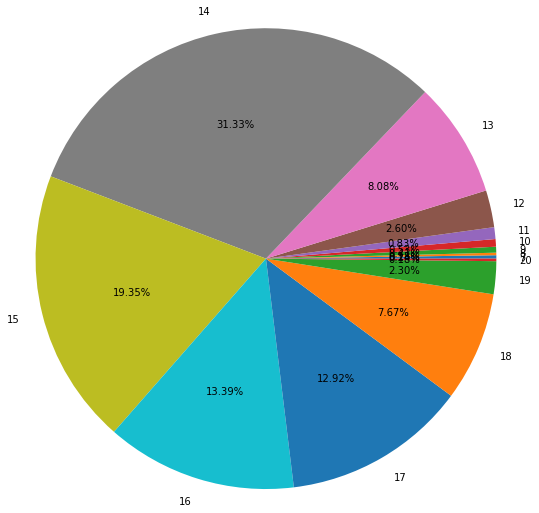

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

ax.pie(labels_sp.values, labels = labels_sp.index,   autopct='%1.2f%%', radius = 2)
plt.show()

### 1.2 Training materials - coverage of recommended fields

 mandatory and recommended fields for training materials:
 
 
 "trainingMaterial": {
    "required": ["label", "description"],
    "recommended": [
      "actors",
      "accessibleAt",
      "externalIds",
      "media",
      "thumbnail",
      "relatedItems"
    ],
    "recommendedProperties": [
      "activity",
      "keyword",
      "discipline",
      "language",
      "object-format",
      "extent",
      "intended-audience",
      "see-also",
      "license",
      "terms-of-use-url",
      "year"
    ]
  }


In [7]:
utils=hel.Util()
recommended_ts='accessibleAt, contributors, externalIds, media, relatedItems, activity, keyword, discipline, language, object-format, extent, intended-audience, see-also, license, terms-of-use-url, year'
recommended_ts_mask=['persistentId', 'MPUrl', 'label','accessibleAt', 'contributors', 'externalIds', 'media', 'relatedItems', 'activity', 'keyword', 'discipline', 'language', 'object-format', 'extent', 'intended-audience', 'see-also', 'license', 'terms-of-use-url', 'year']


df_items_null_values=utils.getItemsWithNullValues(recommended_ts, False)
df_items_null_values_training=df_items_null_values[(df_items_null_values['category']=='training-material')]
df_items_null_values_training

,index,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,...,intended-audience,ts_persistentId_x,see-also,ts_persistentId_y,license,ts_persistentId_x,terms-of-use-url,ts_persistentId_y,year,MPUrl
4644,0,35790,training-material,2.1 Error rates and ground truth - Text Digiti...,baDTwh,2022-01-13T11:45:15+0000,approved,NaN,NaN,"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training-material/baDTwh
4645,1,36558,training-material,3DHOP - How To,T3JbA2,2022-01-13T11:50:33+0000,approved,DHOP was designed to allow the creation of int...,NaN,"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training-material/T3JbA2
4646,2,36216,training-material,3ds Max Tutorials: Introduction,L8gAnu,2022-01-13T11:47:54+0000,approved,"3ds Max is software for 3D modeling, animation...",NaN,"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training-material/L8gAnu
4647,3,35805,training-material,8 Transcriptions of Speech - The TEI Guidelines,H6Y1zV,2022-01-13T11:45:21+0000,approved,NaN,NaN,"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training-material/H6Y1zV
4648,4,15025,training-material,Administración de datos en R,EHGRy5,2021-10-07T13:36:33+0000,approved,Este tutorial explora la manera en que los aca...,"[{'actor': {'id': 3081, 'name': 'Nabeel Siddiq...","[{'type': {'code': 'keyword', 'label': 'Keywor...",...,NaN,NaN,NaN,EHGRy5,license,NaN,NaN,NaN,NaN,training-material/EHGRy5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,313,14793,training-material,Working with Text Files in Python,xdqdgt,2021-10-06T15:37:33+0000,approved,In this lesson you will learn how to manipulat...,"[{'actor': {'id': 2937, 'name': 'William J. Tu...","[{'type': {'code': 'keyword', 'label': 'Keywor...",...,NaN,NaN,NaN,xdqdgt,license,NaN,NaN,NaN,NaN,training-material/xdqdgt
4958,314,36858,training-material,World Digital Library - Content Workflow,vbob91,2022-01-13T11:52:27+0000,approved,This page walks you through the delivery and p...,NaN,"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training-material/vbob91
4959,315,35835,training-material,XPath and Schematron for TEI Customization,UI0KcC,2022-01-13T11:45:32+0000,approved,NaN,NaN,"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training-material/UI0KcC
4960,316,39940,training-material,XPath for Dictionary Nerds,tQZEOd,2022-01-14T07:39:38+0000,approved,XPath (XML Path Language) is a standard query ...,"[{'actor': {'id': 9035, 'name': 'Toma Tasovac'...","[{'type': {'code': 'license', 'label': 'Licens...",...,intended-audience,NaN,NaN,tQZEOd,license,NaN,NaN,NaN,NaN,training-material/tQZEOd


In [8]:
df_items_null_values_sp=df_items_null_values[(df_items_null_values['category']=='training-material')]

df_coverage_sp=df_items_null_values_sp[recommended_ts_mask]

df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)
labels_sp=df_coverage_sp[['MPUrl', 'persistentId', 'label', 'value']].groupby('value').count()['label']

<ipython-input-8-5a16ef88eb59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)


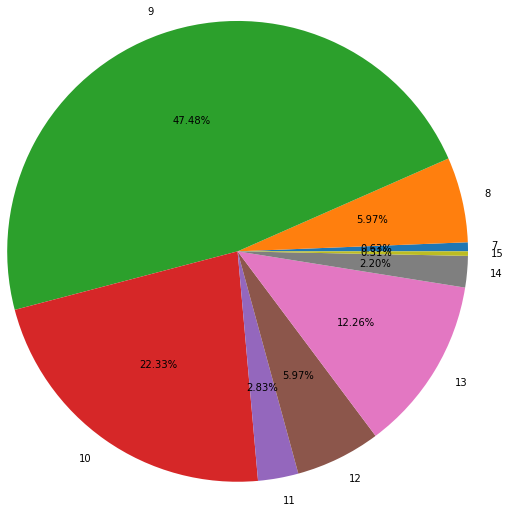

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

ax.pie(labels_sp.values, labels = labels_sp.index,   autopct='%1.2f%%', radius = 2)
plt.show()

### 1.3 Datasets - coverage of recommended fields

mandatory and recommended fields for datasets:

"dataset": {
    "required": ["label", "description"],
    "recommended": [
      "actors",
      "accessibleAt",
      "externalIds",
      "media",
      "thumbnail",
      "relatedItems"
    ],
    "recommendedProperties": [
      "activity",
      "keyword",
      "discipline",
      "language",
      "object-format",
      "extent",
      "intended-audience",
      "see-also",
      "license",
      "year"
    ]
  }


In [10]:
utils=hel.Util()
recommended_ts='accessibleAt, contributors, externalIds, media, relatedItems, activity, keyword, discipline, language, object-format, extent, intended-audience, see-also, license, year'
recommended_ts_mask=['persistentId', 'MPUrl', 'label','accessibleAt', 'contributors', 'externalIds', 'media', 'relatedItems', 'activity', 'keyword', 'discipline', 'language', 'object-format', 'extent', 'intended-audience', 'see-also', 'license', 'year']


df_items_null_values=utils.getItemsWithNullValues(recommended_ts, False)
df_items_null_values_dataset=df_items_null_values[(df_items_null_values['category']=='dataset')]
df_items_null_values_dataset

,index,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,...,extent,ts_persistentId_y,intended-audience,ts_persistentId_x,see-also,ts_persistentId_y,license,ts_persistentId,year,MPUrl
4988,0,12665,dataset,120 Million Word Spanish Corpus,XTUFXt,2021-07-22T09:59:47+0000,approved,Spanish is the second most widely-spoken langu...,"[{'actor': {'id': 1752, 'name': 'Eva Bacas', '...","[{'type': {'code': 'keyword', 'label': 'Keywor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/XTUFXt
4989,1,12549,dataset,2015 New Year's Resolutions,gyTBrn,2021-07-22T09:58:57+0000,approved,A Twitter sentiment analysis of users' 2015 Ne...,"[{'actor': {'id': 1760, 'name': 'Matthew Lavin...","[{'type': {'code': 'keyword', 'label': 'Keywor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/gyTBrn
4990,2,12517,dataset,20th Century Poetry,lHmlhh,2021-07-22T09:58:45+0000,approved,A table of derived word counts from a collecti...,"[{'actor': {'id': 1760, 'name': 'Matthew Lavin...","[{'type': {'code': 'keyword', 'label': 'Keywor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/lHmlhh
4991,3,12590,dataset,3 million Russian troll tweets,gmo8P6,2021-07-22T09:59:15+0000,approved,This data was used in the FiveThirtyEight stor...,"[{'actor': {'id': 1752, 'name': 'Eva Bacas', '...","[{'type': {'code': 'keyword', 'label': 'Keywor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/gmo8P6
4992,4,12579,dataset,"""A BLAST-based, Language-agnostic Text Reuse A...",soZi7a,2021-07-22T09:59:10+0000,approved,"Code and sample corpus used for this article, ...","[{'actor': {'id': 1752, 'name': 'Eva Bacas', '...","[{'type': {'code': 'keyword', 'label': 'Keywor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/soZi7a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,303,12634,dataset,Yelp Academic Challenge Dataset,l8gLBb,2021-07-22T09:59:35+0000,approved,The Yelp dataset is a subset of our businesses...,"[{'actor': {'id': 1752, 'name': 'Eva Bacas', '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/l8gLBb
5292,304,12631,dataset,YelpCHI,xvYQQ4,2021-07-22T09:59:34+0000,approved,This dataset is collected from Yelp.com and fi...,"[{'actor': {'id': 1752, 'name': 'Eva Bacas', '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/xvYQQ4
5293,305,12632,dataset,YelpNYC,IdZGtV,2021-07-22T09:59:35+0000,approved,This dataset is collected from Yelp.com and fi...,"[{'actor': {'id': 1752, 'name': 'Eva Bacas', '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/IdZGtV
5294,306,12633,dataset,YelpZIP,OMny6U,2021-07-22T09:59:35+0000,approved,This dataset is collected from Yelp.com and fi...,"[{'actor': {'id': 1752, 'name': 'Eva Bacas', '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/OMny6U


In [11]:
df_items_null_values_sp=df_items_null_values[(df_items_null_values['category']=='dataset')]

df_coverage_sp=df_items_null_values_sp[recommended_ts_mask]

df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)
labels_sp=df_coverage_sp[['MPUrl', 'persistentId', 'label', 'value']].groupby('value').count()['label']

<ipython-input-11-dc6d07df0430>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)


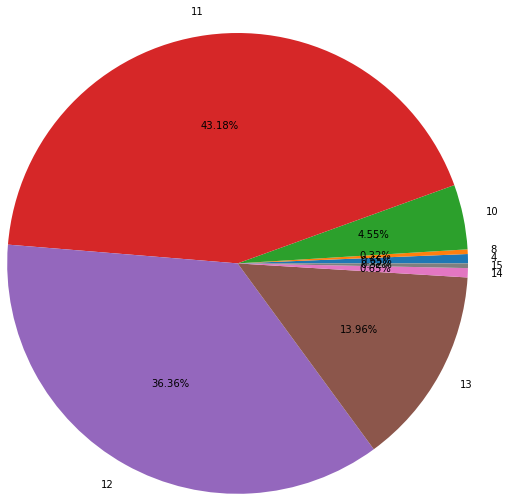

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

ax.pie(labels_sp.values, labels = labels_sp.index,   autopct='%1.2f%%', radius = 2)
plt.show()

### 1.4 Publications - coverage of recommended fields

mandatory and recommended fields for publications:

"publication": {
    "required": ["label", "description"],
    "recommended": [
      "actors",
      "accessibleAt",
      "externalIds",
      "media",
      "thumbnail",
      "relatedItems"
    ],
    "recommendedProperties": [
      "activity",
      "keyword",
      "discipline",
      "language",
      "extent",
      "intended-audience",
      "see-also",
      "license",
      "publication-type",
      "publisher",
      "publication-place",
      "year",
      "journal",
      "conference",
      "volume",
      "issue",
      "pages"
    ]
  }


In [13]:
utils=hel.Util()
recommended_ts='accessibleAt, contributors, externalIds, media, relatedItems, activity, keyword, discipline, language, extent, intended-audience, see-also, license, publication-type, publisher, publication-place, year, journal, conference, volume, issue, pages'
recommended_ts_mask=['persistentId', 'MPUrl', 'label','accessibleAt', 'contributors', 'externalIds', 'media', 'relatedItems', 'activity', 'keyword', 'discipline', 'language', 'extent', 'intended-audience', 'see-also', 'license', 'publication-type', 'publisher', 'publication-place', 'year', 'journal', 'conference', 'volume', 'issue', 'pages']


df_items_null_values=utils.getItemsWithNullValues(recommended_ts, False)
df_items_null_values_publi=df_items_null_values[(df_items_null_values['category']=='publication')]
df_items_null_values_publi

,index,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,...,journal,ts_persistentId_y,conference,ts_persistentId_x,volume,ts_persistentId_y,issue,ts_persistentId,pages,MPUrl
1695,0,37869,publication,1947Partition On The Margins - The Untold Test...,FuBh5c,2022-01-13T14:49:00+0000,approved,NaN,"[{'actor': {'id': 5981, 'name': 'Shaifali Aror...","[{'type': {'code': 'year', 'label': 'Year', 't...",...,NaN,FuBh5c,conference,NaN,NaN,NaN,NaN,NaN,NaN,publication/FuBh5c
1696,1,38456,publication,1 Million Dutch Newspaper Images available for...,EppSCv,2022-01-13T14:59:28+0000,approved,NaN,"[{'actor': {'id': 5366, 'name': 'Martijn Klepp...","[{'type': {'code': 'pages', 'label': 'Pages', ...",...,NaN,EppSCv,conference,NaN,NaN,NaN,NaN,EppSCv,pages,publication/EppSCv
1697,2,10414,publication,3D-ICONS -- 3D Digitisation of Icons of Europe...,jOum8c,2021-06-23T17:03:55+0000,approved,3D-ICONS was a pilot project funded under the ...,NaN,"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,publication/jOum8c
1698,3,39213,publication,3D Scanning for Preservation - Difficulties an...,A6IsdT,2022-01-13T15:12:05+0000,approved,NaN,"[{'actor': {'id': 8159, 'name': 'Graham Fereda...","[{'type': {'code': 'pages', 'label': 'Pages', ...",...,NaN,A6IsdT,conference,NaN,NaN,NaN,NaN,A6IsdT,pages,publication/A6IsdT
1699,4,37764,publication,3rd International Workshop on Computational Hi...,oKWLnW,2022-01-13T14:47:12+0000,approved,NaN,"[{'actor': {'id': 5328, 'name': 'Marten Düring...","[{'type': {'code': 'year', 'label': 'Year', 't...",...,NaN,NaN,NaN,oKWLnW,volume,NaN,NaN,NaN,NaN,publication/oKWLnW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,2944,38210,publication,Zampolli Award Lecture,kcYu4z,2022-01-13T14:55:31+0000,approved,NaN,"[{'actor': {'id': 4285, 'name': 'Ray Siemens',...","[{'type': {'code': 'year', 'label': 'Year', 't...",...,NaN,kcYu4z,conference,NaN,NaN,NaN,NaN,NaN,NaN,publication/kcYu4z
4640,2945,38084,publication,Z-Axis Scholarship - Modeling How Modernists W...,LDkNH1,2022-01-13T14:53:06+0000,approved,NaN,"[{'actor': {'id': 6435, 'name': 'Alex Christie...","[{'type': {'code': 'year', 'label': 'Year', 't...",...,NaN,LDkNH1,conference,NaN,NaN,NaN,NaN,NaN,NaN,publication/LDkNH1
4641,2946,37120,publication,Zemsky Educational Establishments - Developmen...,FZ0To0,2022-01-13T14:33:28+0000,approved,NaN,"[{'actor': {'id': 4151, 'name': 'Iliana Damiro...","[{'type': {'code': 'year', 'label': 'Year', 't...",...,NaN,FZ0To0,conference,NaN,NaN,NaN,NaN,NaN,NaN,publication/FZ0To0
4642,2947,37518,publication,"ZX Spectrum, or Decentering Digital Media Plat...",suqKDO,2022-01-13T14:42:22+0000,approved,NaN,"[{'actor': {'id': 5210, 'name': 'Piotr Marecki...","[{'type': {'code': 'pages', 'label': 'Pages', ...",...,NaN,suqKDO,conference,NaN,NaN,NaN,NaN,suqKDO,pages,publication/suqKDO


In [14]:
df_items_null_values_sp=df_items_null_values[(df_items_null_values['category']=='publication')]

df_coverage_sp=df_items_null_values_sp[recommended_ts_mask]

df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)
labels_sp=df_coverage_sp[['MPUrl', 'persistentId', 'label', 'value']].groupby('value').count()['label']

<ipython-input-14-b7d966e1f2fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)


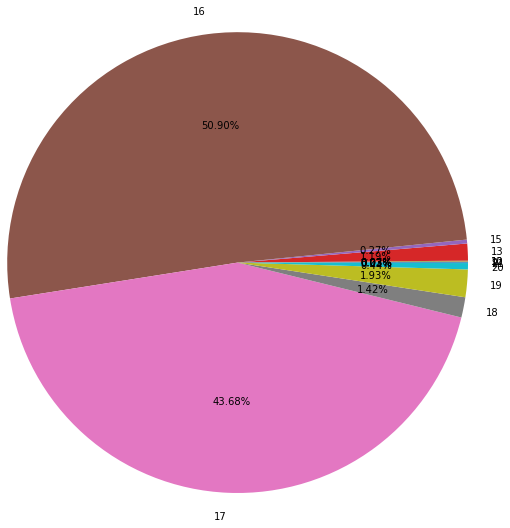

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

ax.pie(labels_sp.values, labels = labels_sp.index,   autopct='%1.2f%%', radius = 2)
plt.show()

### 1.5 Workflows - coverage of recommended fields

?? Given the very specific nature of workflow, might be better to not include workflows in this coverage flag ??


## 2. Flag priority items for curation 

Given the poor initial (meta)data quality of MP items, a stricter approach than the recommended properties is taken to set up the curation-flag-coverage.

Depending on the item type, fields that are not covered by other curation flags (i.e. URLs are already inspected via another curation flag) and that are considered high priority to ensure the (meta)data quality of a given item type are defined and inspected.

A two steps approch is defined:
- in the first place (early 2021), the curation-flag is raised when all the fields defined are empty: getItemsWithNullValues(*dataset chosen*, **True**)
- when the data quality will be better, the number of fields used can be enlarged and/or the input parameters modified. For example, if getItemsWithNullValues(*dataset chosen*, **False**) is set to `False` the flag would be raised if at least one value is null among the set of fields chosen


### 2.1 Tools and services coverage 

For tools and services, `activity`, `keyword` and `license` are considered as the most important fields, and should be filled in for all tools and services items. 

This could be easily chnaged in the future.

Because getItemsWithNullValues is set to `True`, all items for which `activity`, `keyword` and `license` are empty (have null values) are listed and will be included in the `curation-flag-coverage`.

In [16]:
utils=hel.Util()
tool_coverage_ts='activity, keyword, license'
tool_coverage_ts_mask=['persistentId', 'MPUrl', 'label','accessibleAt', 'activity', 'keyword', 'license']


df_items_coverage_null_values=utils.getItemsWithNullValues(tool_coverage_ts, True)
df_items_coverage_null_values_tools=df_items_coverage_null_values[(df_items_coverage_null_values['category']=='tool-or-service')]
table_coverage_null_values_tools=df_items_coverage_null_values_tools[tool_coverage_ts_mask].style.format({'MPUrl': utils.make_clickable})
table_coverage_null_values_tools

,persistentId,MPUrl,label,accessibleAt,activity,keyword,license
1,4gDAHv,tool-or-service/4gDAHv,3DF Zephyr - photogrammetry software - 3d models from photos,['https://www.3dflow.net/3df-zephyr-pro-3d-models-from-photos/'],nan,nan,nan
2,UcxOmD,tool-or-service/UcxOmD,3DHOP,['http://vcg.isti.cnr.it/3dhop/'],nan,nan,nan
3,uFIMPQ,tool-or-service/uFIMPQ,3DHOP: 3D Heritage Online Presenter,['https://github.com/cnr-isti-vclab/3DHOP'],nan,nan,nan
4,kAkzuz,tool-or-service/kAkzuz,3DReshaper \| 3DReshaper,['https://www.3dreshaper.com/en/'],nan,nan,nan
5,9NKBY5,tool-or-service/9NKBY5,"3ds Max \| 3D Modeling, Animation \& Rendering Software",['https://www.autodesk.com/products/3ds-max/overview'],nan,nan,nan
10,qbhnQw,tool-or-service/qbhnQw,A360 \| Project Collaboration in the Cloud,['https://a360.autodesk.com/'],nan,nan,nan
20,3NqTBe,tool-or-service/3NqTBe,Adobe Acrobat Reader,nan,nan,nan,nan
21,sc1bNI,tool-or-service/sc1bNI,Adobe Acrobat Reader,nan,nan,nan,nan
27,E34Hob,tool-or-service/E34Hob,Adobe Photoshop,['http://www.adobe.com/products/photoshop.html'],nan,nan,nan
36,HRUmqc,tool-or-service/HRUmqc,A JavaScript library for rendering music notation and guitar tablature.: 0xfe/vexflow,['https://github.com/0xfe/vexflow'],nan,nan,nan


In [17]:


print (f'\n There are {df_items_coverage_null_values_tools[tool_coverage_ts_mask].shape[0]} tools and services items where the values in activity, keyword, license are null \n')



 There are 243 tools and services items where the values in activity, keyword, license are null 



### 2.2

To be continued with training, datasets, publications and workflows